In [1]:
import tensorflow as tf

import os, pathlib, warnings, urllib, shutil

warnings.filterwarnings("ignore")

In [2]:
if not os.path.exists("Helper.py"):

  giturl = "https://raw.githubusercontent.com/Kelnite/Hut/refs/heads/main/Helper.py"

  urllib.request.urlretrieve(giturl, "Helper.py")

In [3]:
from Helper import GetFile

giturl = "https://github.com/dicodingacademy/assets/releases/download/release/"

dataset = "rockpaperscissors.zip"

GetFile(giturl, dataset, "/content", unpack=True, file_type="zip")

'/content'

In [4]:
root = "/content/rockpaperscissors/rps-cv-images"

os.listdir(root)

['scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rescale = 1.0 / 255.0; total_batch = 128

trainset = ImageDataGenerator(
  rescale = rescale,
  rotation_range = 10,
  validation_split = 0.3,
  zoom_range = 0.2,
  shear_range = 0.2,
  fill_mode = 'nearest'
)

train = trainset.flow_from_directory(
  root,
  target_size = (150, 150),
  class_mode = "categorical",
  batch_size = total_batch,
  subset = "training"
)

In [6]:
labeler = list(train.class_indices.keys())

labeler

['paper', 'rock', 'scissors']

In [ ]:
validset = ImageDataGenerator(
  rescale = rescale,
  validation_split = 0.3
)

valid = validset.flow_from_directory(
  root,
  target_size = (150, 150),
  class_mode = "categorical",
  batch_size = total_batch,
  subset = "validation"
)

In [8]:
from tensorflow.keras.models import Sequential

from tensorflow.keras import layers

model = Sequential([
  layers.Conv2D(16, 3, activation="relu", input_shape=(150, 150, 3)),
  layers.MaxPool2D((2, 2)),
  layers.Conv2D(32, 3, activation="relu"),
  layers.MaxPool2D((2, 2)),
  layers.Conv2D(64, 3, activation="relu"),
  layers.MaxPool2D((2, 2)),
  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(128, activation="relu"),
  layers.Dense(3, activation="softmax")
])

loss = "categorical_crossentropy"

model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

In [9]:
hist = model.fit(train, epochs=10, validation_data=valid, verbose=False)

In [10]:
model.evaluate(train, verbose=False)

[0.07232635468244553, 0.9797782301902771]

In [11]:
model.evaluate(valid, verbose=False)

[0.05629769712686539, 0.9786259531974792]

In [12]:
if not os.path.exists("Helplot.py"):

  giturl = "https://raw.githubusercontent.com/Kelnite/Hut/refs/heads/main/Helplot.py"

  urllib.request.urlretrieve(giturl, "Helplot.py")

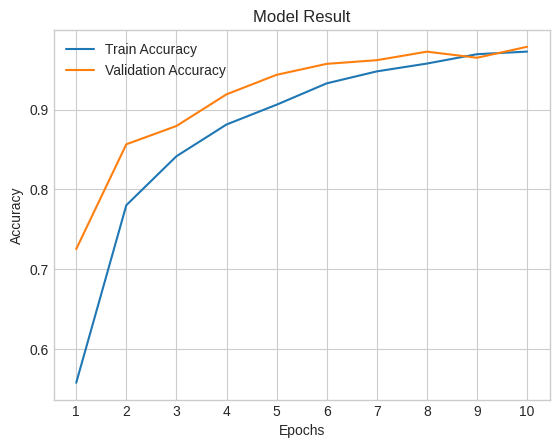

In [13]:
from Helplot import Helplot

plot = Helplot(hist, 'accuracy')

plot.Relplot

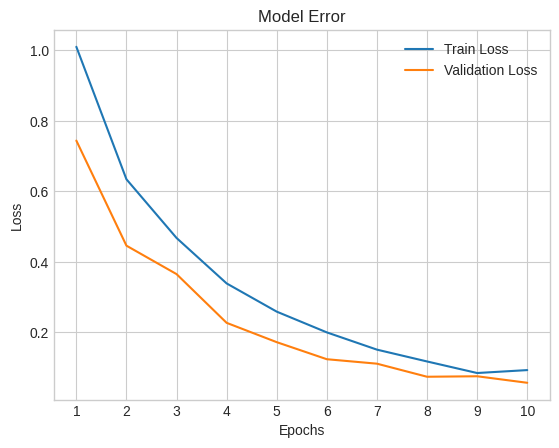

In [14]:
plot.Falplot

In [ ]:
ModelFolder = "/content/Modelite"

model.export(ModelFolder)

In [16]:
tflite = tf.lite.TFLiteConverter

tflite_model = tflite.from_saved_model(ModelFolder)

tflite_model.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = tflite_model.convert()

pathfile = "HutModel01.tflite"

tflite_model_file = pathlib.Path(pathfile)

tflite_model_file.write_bytes(tflite_model)

2401456

In [17]:
os.path.getsize(pathfile) / float(2**20)

2.2902069091796875

In [18]:
interpreter = tf.lite.Interpreter(model_path=pathfile)

interpreter.get_signature_list()

{'serving_default': {'inputs': ['keras_tensor'], 'outputs': ['output_0']}}

In [19]:
lite_interpreter = interpreter.get_signature_runner('serving_default')

lite_interpreter

In [20]:
paper = "/content/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png"

tester = tf.keras.utils.load_img(paper, target_size=(150, 150))

tester = tf.keras.utils.img_to_array(tester)

tester = tf.expand_dims(tester, axis=0)

tester = tf.cast(tester / 255.0, tf.float32)

tester.shape

TensorShape([1, 150, 150, 3])

In [21]:
testa = lite_interpreter(keras_tensor=tester)['output_0']

testa

array([[1.0000000e+00, 9.3682306e-29, 1.6935764e-33]], dtype=float32)

In [22]:
labeler[tf.math.argmax(testa[0])]

'paper'

In [24]:
test_img, test_label = next(iter(valid))

logits = model.predict(test_img, verbose=0)

logits.shape

(128, 3)